### Объяснение Трансформеров
Архитектура трансформера (`Transformer`) - это модель для обработки последовательностей данных, впервые представленная в статье `"Attention is All You Need"` от `Google Research` где исследователи предложили новую архитектуру для перевода слов с одного языка на другой. Также, был впервые введен алгоритм внимания (Attention) и объяснение его работы.

### Немного про Word2Vec
В алгоритме `Word2Vec` мы обучаем несложную модель (двуслойная нейронная сеть) в которой мы в заданном контекстном окне пытаемся по слову предсказать окружающие его слова или по соседним словам предсказать слово. На выходе мы всегда получаем матрицу эмбеддингов определенной размерности. Обычно ширина такой матрицы обозначает размерность эмбеддингов, а длина - размер словаря. Если слово из текста не присутствует в матрице эмбеддингов, то мы его выбрасываем и неучитываем.

Основными гиперпараметрами матрицы эмбеддингов являются:
- Размерность эмбеддингов (число столбцов)
- Размер словаря (число строк)

Несложно догадаться, что это не совсем хорошо, так как данные слова могут быть полезные для решаемой задачи.

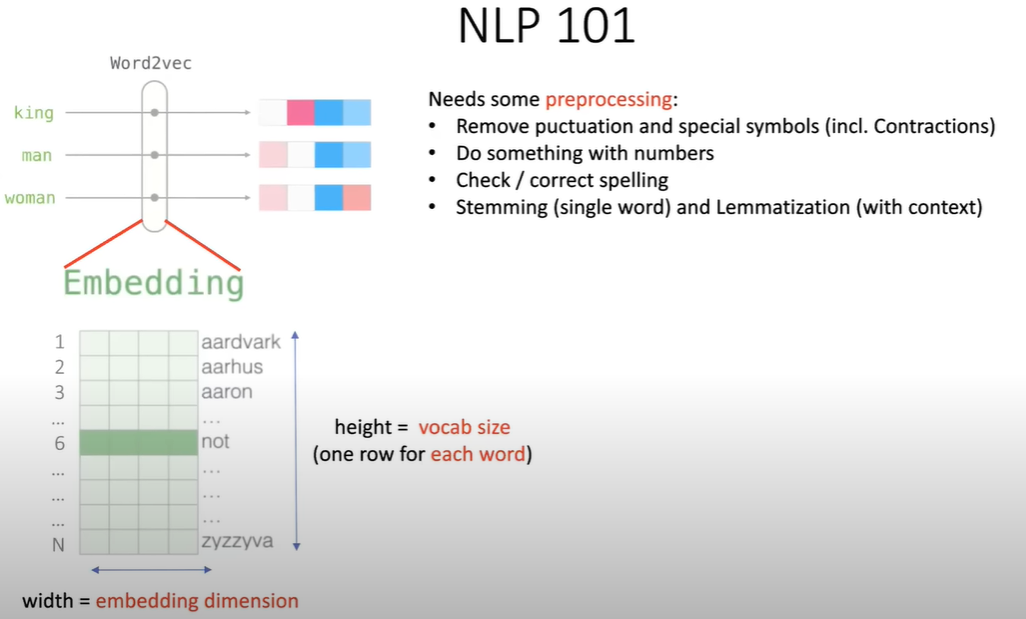

### Почему мы хотим представлять слова как вектора?
Так как каждая модель МО работает с векторами: любо внутри работает с векторами либо принимает вектора на вход. Модели МО не умеют работать с явным текстом, они оперируют числами и векторами.

**Табличные данные**
- Собираем матрицу обхекты-признаки и обучаем градиентный бустинг на данной матрице/векторах


### Как представить текст последовательностью эмбеддингов?
- `Text2Tokens` используем токенайзер: переходим от текста к последовательности токенов
- `Look up Tokens IDs`: сопоставляем для каждого токена ID из матрицы эмбеддингов
- `Embeddings Look up`: по ID находим эмбеддинги 
- `Text2Embeddings`: представляем текст как последовательность эмбеддингов -> то как алгоритм должен видеть подаваемый текст

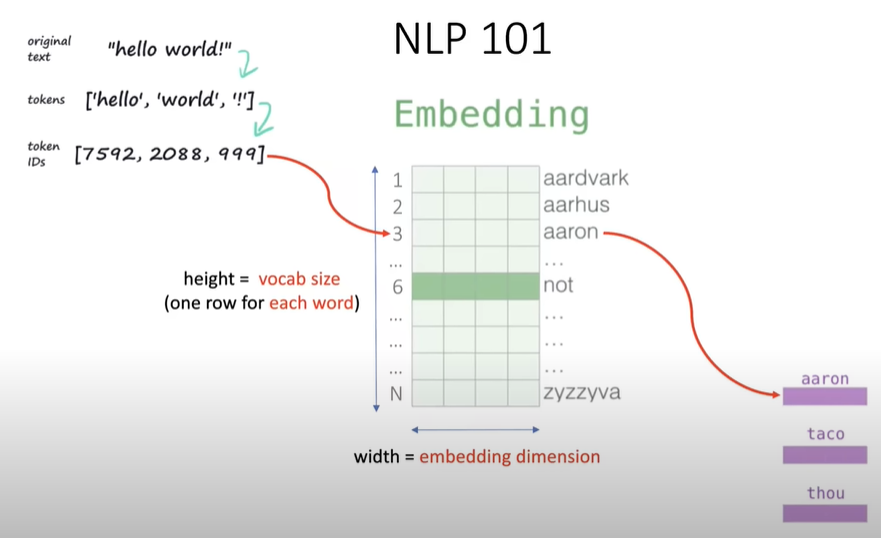

### Что можно сделать с полученной последовательность эмбеддингов?
Один из вариантов - усреднение, однако этот вариант очень примитивный и не позволяет уловить множество закономерностей текста или слова. Поэтому архитектура трансформер позволяет ввести абсолютно новый уровень абстракции над эмбеддингами слов.

### Как можно представлять текст?
Слова текста можно представлять по-разному:

- **Буквы** (большие и маленькие, цифры, знаки препинания, ...)
    - Малый размер словаря 
    - Не лучший способ представления данных:
        - Сильно возрастает длина входной последовательности для модели. Плохо, так как модели работают быстрее на малых длинах
        - Сематика букв не столь интересна, сколько семантика отдельных слов

- **Слова** (Stemming/Lemmatization)
    - Очень сильно возрастает размер словаря, плохо, нужно много памяти для хранения матрицы эмбеддингов
    - Сильно снижается длина входной последовательности, так как подаем целые слова
    - Семантика слов, а не букв. Модель может выучитвать закономерности и значения слов

Хочется получить золотую середину где мы бы не использовали буквы и целые слова, чтобы не "раздувать" словарь эмбеддингов и не увеличивать размер входной последовательности, но сохранить смысл и закономерности между частями слова.

- **Вычленение самых частых буквосочетайни**
    - Оптимальный размер словаря
    - Оптимальный размер входной последовательности
    - Сохранение семантики и закономерностей между частями слов

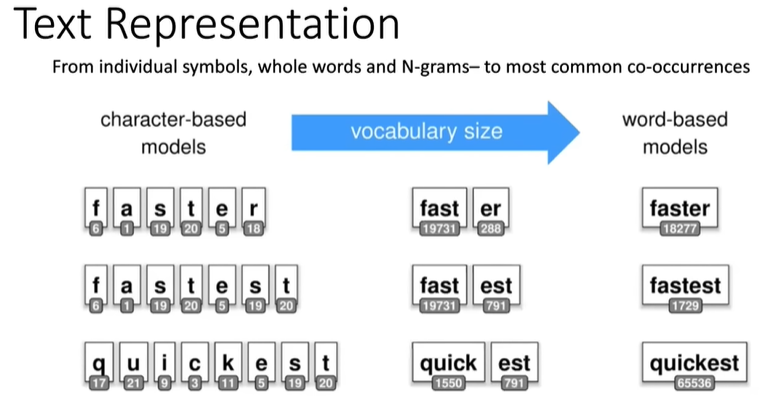

### Какие алгоритмы токенизации могут использоваться?
Например, для более эффективной токенизации (небольшой размер словаря и небольшая длина входной последовательности) могут использоваться следующие токенайзеры:
- Byte Pair Encoding (BPE)
    - GPT-like модели (OpenAI, ...)
- Word Piece + Sentence Piece
    - BERT-like модели (Google, ...)

Одним из способ определить оптимальное число токенов, это перебор в диапазоне от 25-60тыс и смотреть на крайние токены по частотности. Если в токенах, которые находятся в конце списка по частотности нет особого смысла, то их можем исключать и таким образом уменьшать размерность словаря. 

### Архитектура трансформер
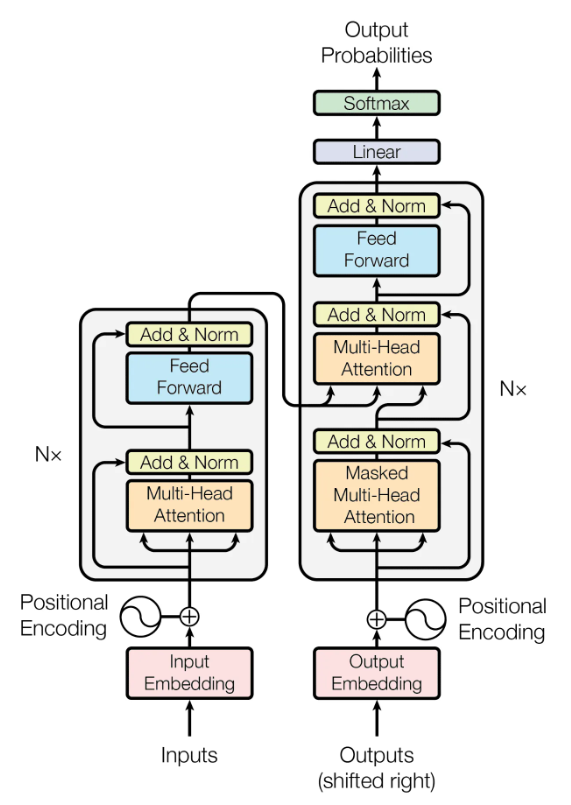

Данная архитектура пришла из задачи машинного перевода и состоит из 2-х основных блоков:
- Энкодер
    - Работает с одним конретным языком и формирует эмбеддинги агностичные к языку
- Декодер
    - Принимает эмбеддинги, представляющие закодиррованные энкодером слова, и декодирует их на свой язык

Энкодер и декодер состоят из повторяющихся блоков. Эмбеддинги, проходя через эти блоки обогощаются информацией, и получается переведенный текст. 

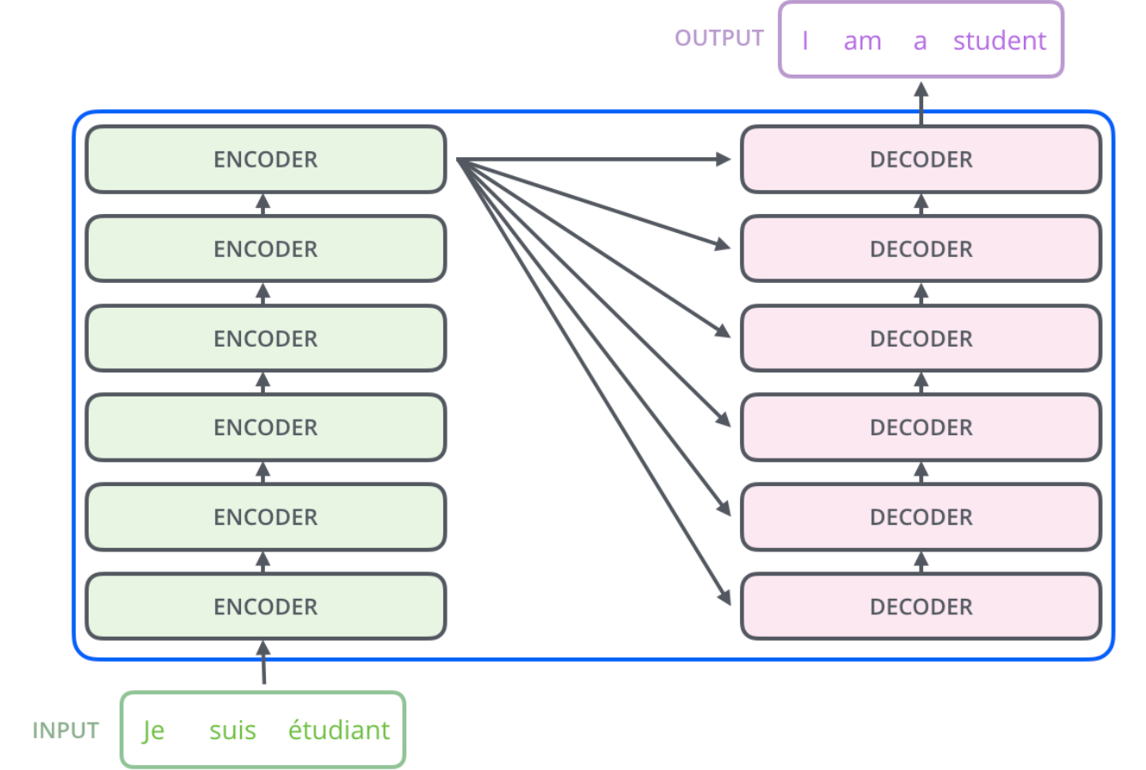

### Encoder Block
Энкодер блок состоит из 2-х основных элементов:
- `Self-Attention`
    - Отвечает за "коммуникацию" / communication
- `Feed Forward NN`
    - Отвечает за "вычисления" / computation

Каждый Encoder принимает на вход и выдает на выход N эмбеддингов размерности D. Есть требование, что размерность входных эмбеддингов должна быть равна размерности выходных эмбеддингов. Это не случайно и позволяет стакать один Encoder блок над другим.

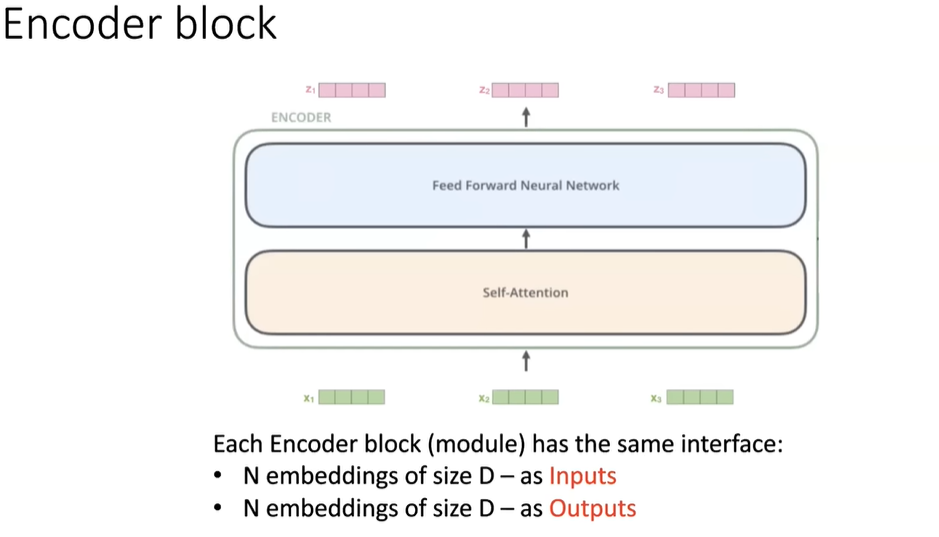

**Communication**
- Модель должна обрабатывать токены, учитывая их контекст, а не отдельно. Каждое слово должно зависеть от контекста.

**Computation**
- Набор вычислений или слоев нейронной сети, позволяющий делать дополнительные преобразования и усложнять модель (обчать больше параметров модели и улучшать в идеале качество).

### Feed Forward Layer
Представлен обычной двуслойной нейронной сетью с нелинейно функцией активации. Данный блок сначала увеличивает размерность эмбеддинга, а затем снова понижает его. На практике, обычно принято увеличивать в 4 раза больше. Именно в 4, так как большиее значения (8/16) сильно "раздувают" эмбеддинги, получается очень большая матрица, которая неэффективан с точки зрения вычислений. Меньше 4, тоже плохо, так как эмбеддинги становятся слишком маленькими и не могут нормально обучаться. Поэтому 4, это просто хорошее эвристическое правило.

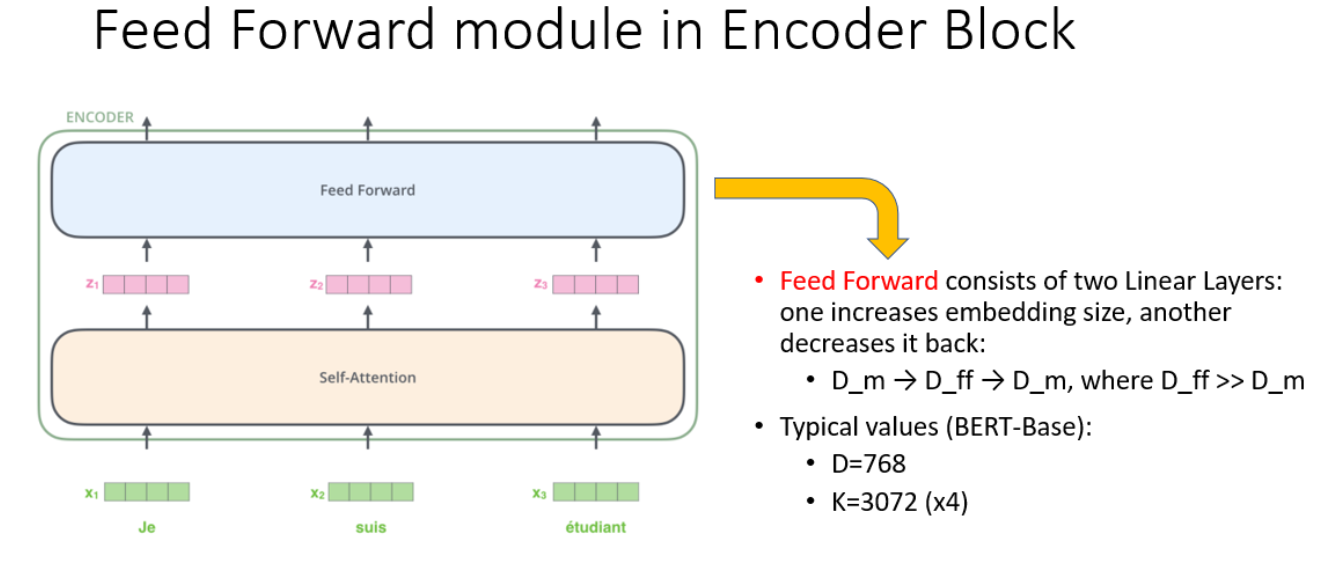

- Было замечено, чем выше уровень энкодера (число блоков), тем более сложные закономерности может выявлять модель. Однако, мы не можем наращивать их до бесконечности, так как возникает проблема затухания градиентов. Также, мы можем оптимизировать не число блоков, а их ширину.

- Вычисления в энкодерах нельзя распаралелить, так как вычисления зависимые.

- `Feed Forward` слои содержат самое большое число параметров всей модели (от 2/3 до 3/4)

- Размерность получаемых эмбеддингов в трансформере может быть гораздо больше чем в `Word2Vec` (например, более 10k)

### Self-Attention
Этот механизм позволяет модели оценивать важность каждого слова или элемента входных данных по отношению ко всем остальным элементам. Таким образом, модель может учитывать контекст при выполнении задач, таких как классификация текста, генерация текста или машинный перевод.

Суть `self-attention` заключается в том, что каждое слово (или элемент) во входных данных взаимодействует с каждым другим словом в предложении (или элементом) для определения его важности. Это позволяет модели улавливать долгосрочные зависимости в данных и эффективно обрабатывать длинные последовательности.

Процесс `self-attention` обычно включает в себя вычисление трех важных компонентов:

- `Query (запрос)`: это вектор, который используется для вычисления важности текущего элемента относительно всех остальных элементов во входных данных. Например, для слова `X` я хочу понять какие другие слова важны для него, а какие нет. Вектор, где каждая компонента определят важность связи с другим словом (0 -> связи нет, 0.9 -> сильная связь)

- `Key (ключ)`: это вектор, который представляет собой характеристики элемента во входных данных. Например, `Key` может означать краткий смысл слова, вектор данного слова обычно меньше вектора `value` и описывает смысл слова в узком смысле. 

- `Value (значение)`: это вектор, который представляет собой информацию, связанную с элементом, и который учитывается в зависимости от его важности, определенной с помощью `Query` и `Key`. Хранит смысл слова в широком смысле, учитывая контекст. Размерность этого вектора обычно больше размерности вектора `key` => хранит больше информации. Например, мы имеем большую кллекцию из 1М документов. `Key` для конкретного слова может означать его смысл в предложении или нескольких предложениях, а `value` будет означать основной смысл этого слова, выученный на всех документах.

### Алгоритм Self-Attention
Представим, что наш Transformer принимает два слова/эмбеддинга: `Thinking machines`. Сам `self-attention` представляет из себя триплет матриц `Q, K, V (Query, Key, Value)` которые в самом начале инициализируются случайными малыми значениями и обучаются в процессе тренировки модели.

Очень важно, чтобы размерность входных эмьеддингов совпадала с размерностью матриц.

 Например, если входные эмбеддинги имеют размерность `(n x m)`, то матрицы `self-attention` должны иметь размерность `(m x k)`, в результате их перемножения будет получаться вектор размерностью `(n x k)`.

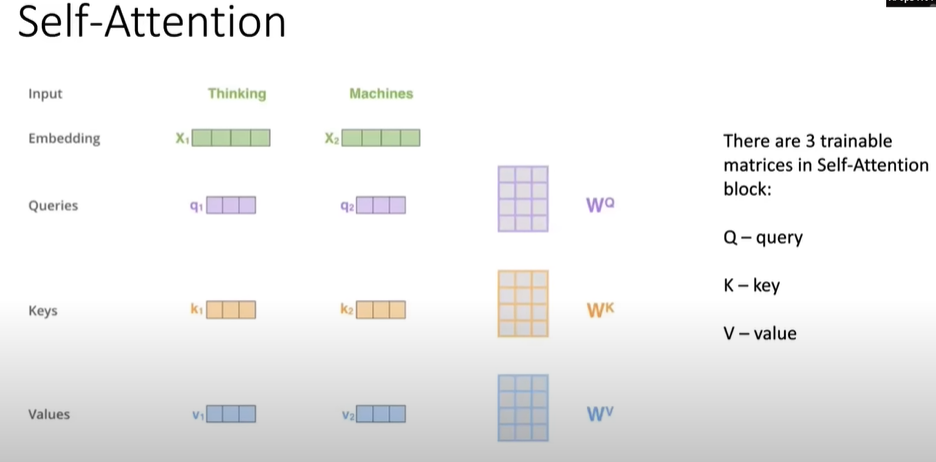

Далее вектора `q` и `k`, получаемые при перемножении входных эмбеддингов и триплета матриц, скалярно пермножаются и получается единственное число (скаляр) для каждого входного эмбеддинга. Причем, мы рассчитываем данный `score` для каждого слова. Например, для 3 слов мы имеем 3 эмбеддинга и 3 вектора `q, k, v`, тогда `score` для каждого слова будет рассчитан:
- `q1 * k1 = score`: score, описывающий связь 1 слова с самим собой
- `q1 * k2 = score`: score, описывающий связь 1 слова со 2-м словом
- `q1 * k3 = score`: score, описывающий связь 1 слова с 3-им словом
- `q2 * k1 = score`: score, описывающий связь 2 слова с 1-м словом
- `q2 * k2 = score`: score, описывающий связь 2 слова с самим собой
- `q3 * k3 = score`: score, описывающий связь 2 слова с 3-им словом
- ...

Важное следствие: чем больше `dot-product` тем сильнее связь 2-х слов (более схожи).

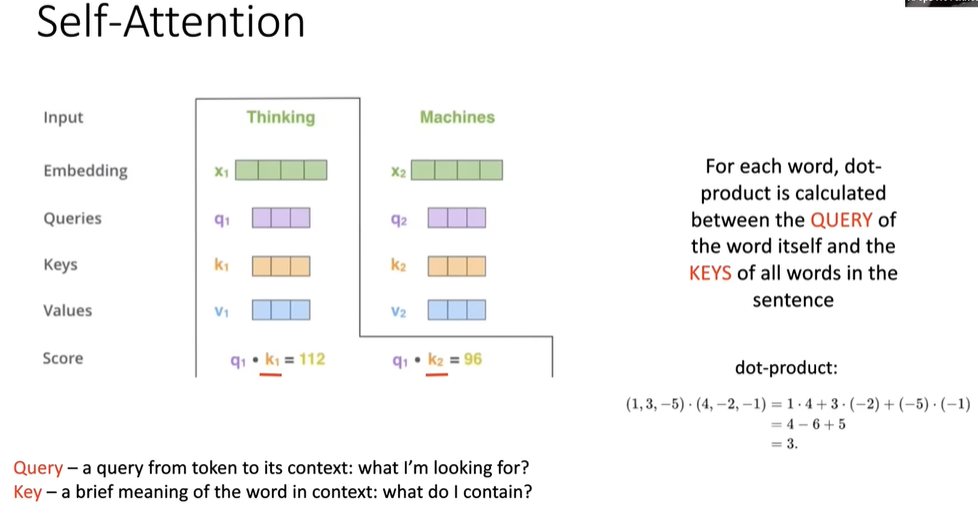

Данный алгоритм можно сравнить, с рыбалкой. Наша удочка является query, и мы закидываем удочку для каждого слова и смотрим, какие другие слова клюют на данное слово/наживку.

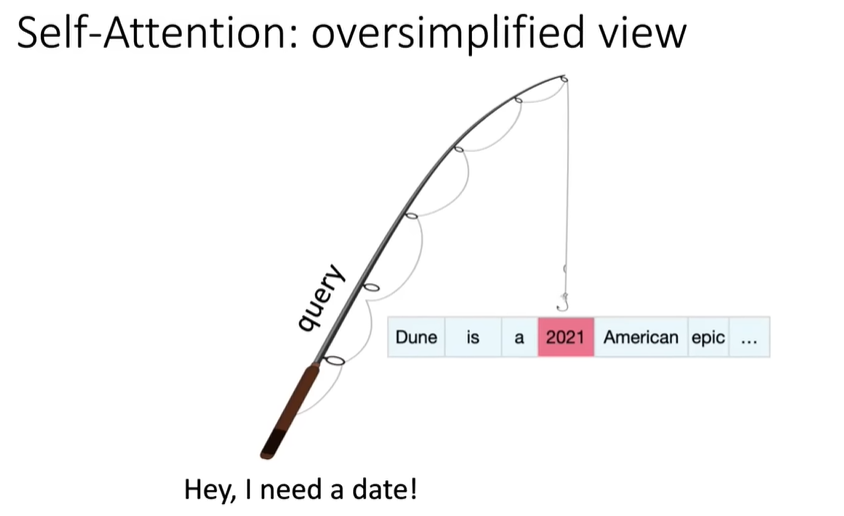

Из экспериментов было выявлено, что получаемые `score` необходимо нормировать. Золотое правило которые определили:
- sqrt(embedding_dim)

Возникает вопрос, почему именно так?

Так как матрицы `self-attention` инициализируются случайными числами из стандартного нормального распределения, то их среднее = 0 и std = 1. Однако при матричном умножении таких матрицы, их стандратное отклонение увеличивается в 17 раз! Все это сильно раздувает получаемые значения, их амплитуда сильно возрастает. Следовательно, для избежания затухания градиентов или их взрыва производится данная нормировка, также это помогает более стабильно обучать модель.

Также мы всегда хотим чтобы распределение весов от слоя к слою было всегда стандартным нормальным (средее 0 и std 1) для обеспеяения стабильной тренировки.

Далее, получаемые `score` нормируются, ипользуя `Softmax`

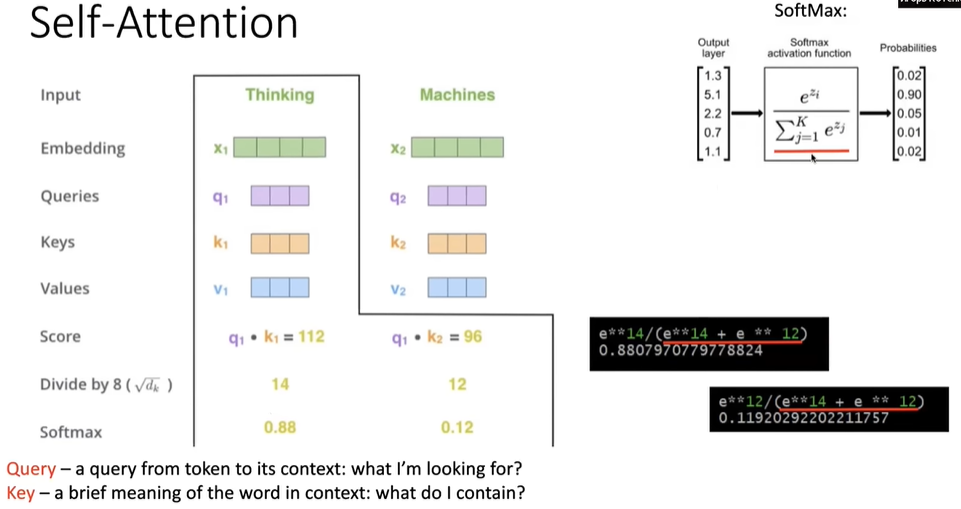

**Softmax**
- Сначала считает сумму экспонент значений, и затем, возводя данное число в экспоненту, определяет какую долю данное число занимает от итоговой суммы. Получаемые значения часто можно интерпретировать как вероятности или важность веса (0.9 - 90% всех весов принадлежит определенному объекту).

Однако у нас еще есть `value` вектор который мы пока не использовали. Получаемые нормированные `score` просто перемножаются со всеми остальными `value` и суммируются **поэлементно.** Это происходит для каждого слова. Например:
- `z1 = v1*score_1_1 + v2*score_1_2 + ... + vn*score_1_n`
- `z2 = v1*score_2_1 + v2*score_2_2 + ... + vn*score_2_n`
- ...

Таким образом, значенения которые получаются после **softmax** - это своего рода предсказание весов с которыми необходимо вытянуть эмбеддинги из вектора `v`

Важно:
- Вектора `q` и `k` обязательно должны иметь одинаковую размерность, так как мы их перемножаем. Размерность вектора `v`может быть любой.
- Алгоритм `self-attention` считает важность слова с каждым другим словом -> имеем квадратную матрицу. Это имеет сложность `O(n^2)`
- `Self-attention` квадратичен по сложности к числу входных токенов. Следовательно, чем меньше токенов мы имеем, тем быстрее работает модель. Вот почему нам необходимо иметь хороший токенайзер.

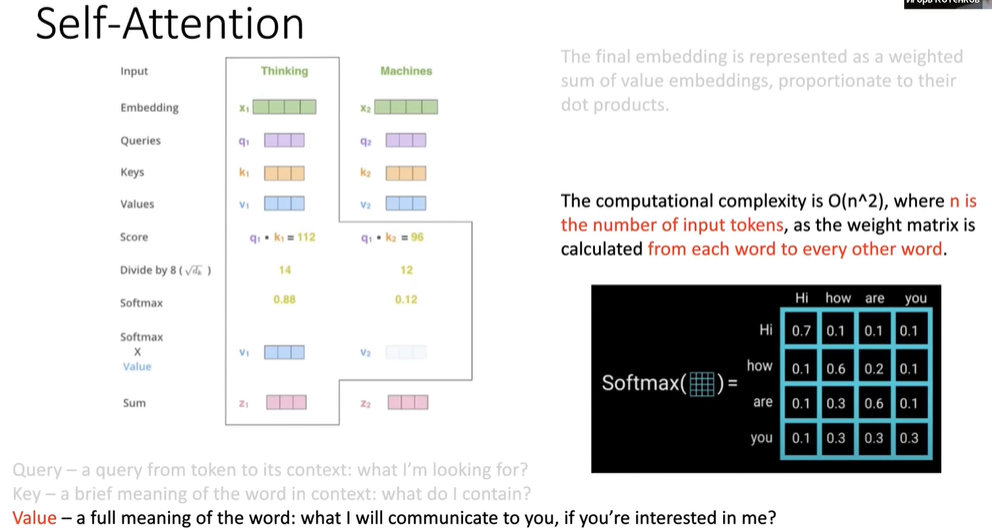

Вот так может выглядеть обученная матрица Attention

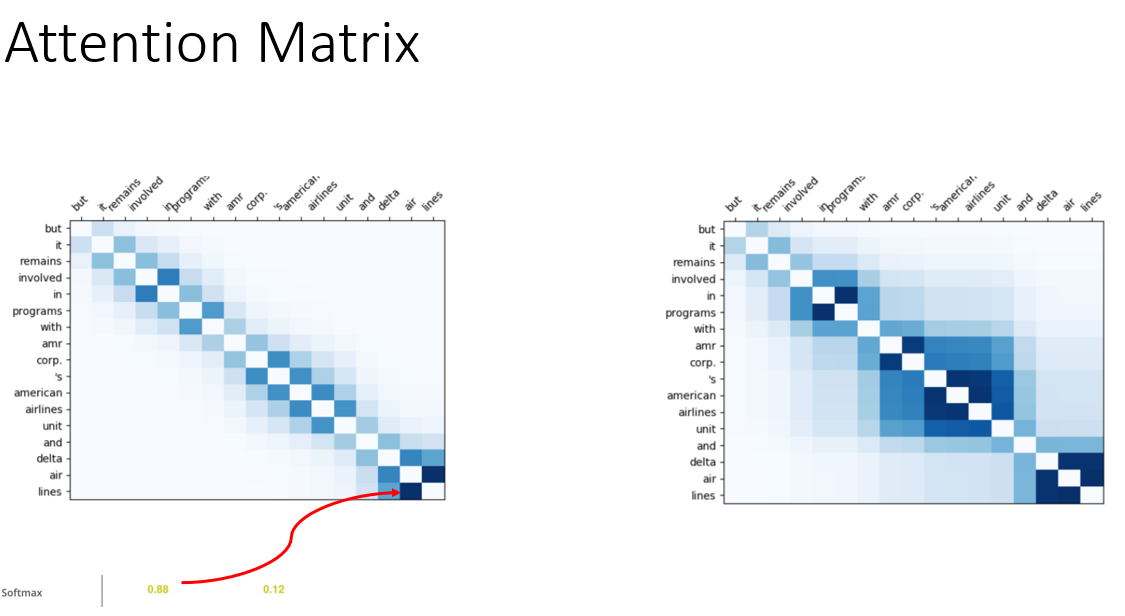

Существуем множество экспериментов, которые пытаются улучшить производительность Attention Matrix. Например, можно считать Attention следующим образом:

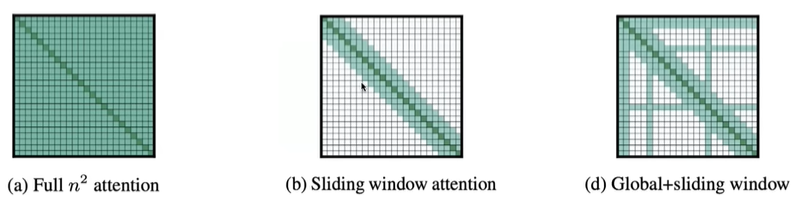

- `Full n^2 Attention`:
    - Cчитаем связь каждого слова с каждым
- `Sliding Window Attention`: 
    - Cчитаем `attention` в некотором скользящем окне. Например для слова `X`, считаем `attention` для `N` слов слева и справа а также для самого слова.
- ...

### MutiHead Self-Attention
Вместо одного триплета матриц `Q, V, K` можно использовать `N-триплетов.` Каждый такой отдельный триплет называется `Head` который при старте обучения сети инициализируется случайными значениями. 
Каждая голова будет обращать внимания на разные элементы предложения и учить свои свои закономерности.

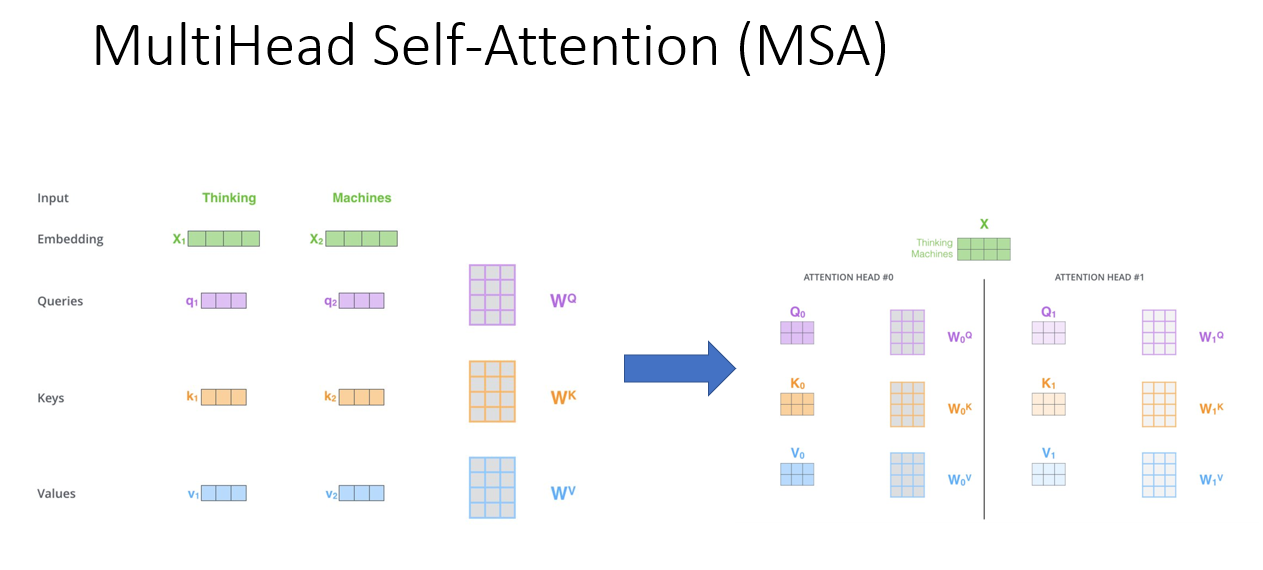

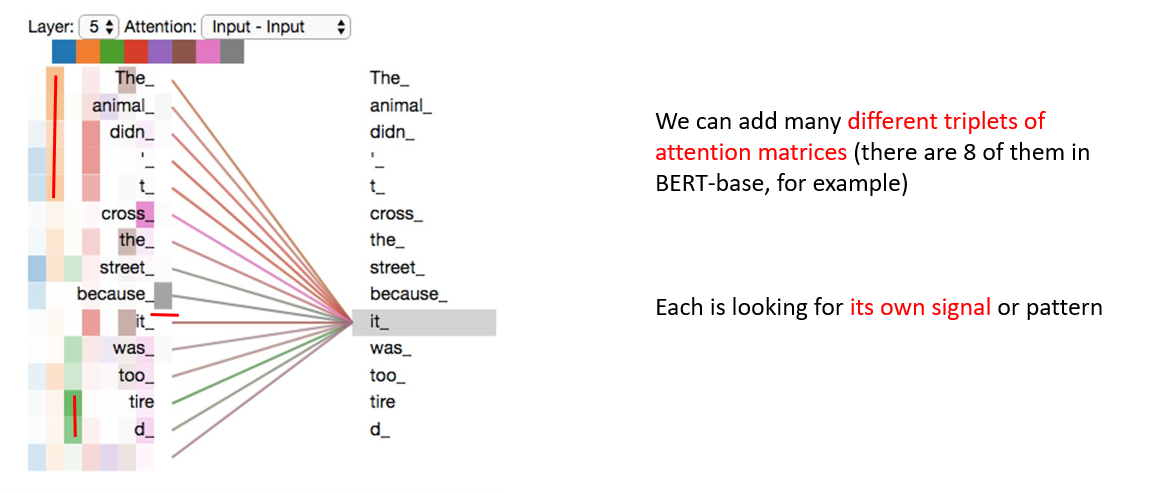

Матричные умножения позволяют очень эффективно считать произвдения матриц `Q, V, K` на матрицу входных эмбеддингов. Например, за одну операцию матричного умножения мы можем посчитать произведение матрицы `Q` на `X` (может даже можно посчитать все 3 сразу если использовать тензор). Далее мы транспонируем матрицу `K` и перемножаем с `Q` чтобы получить `score`. Далее, нормируем полученную матрицу и применяем `softmax` построчно и умножаем на вектор `v` 

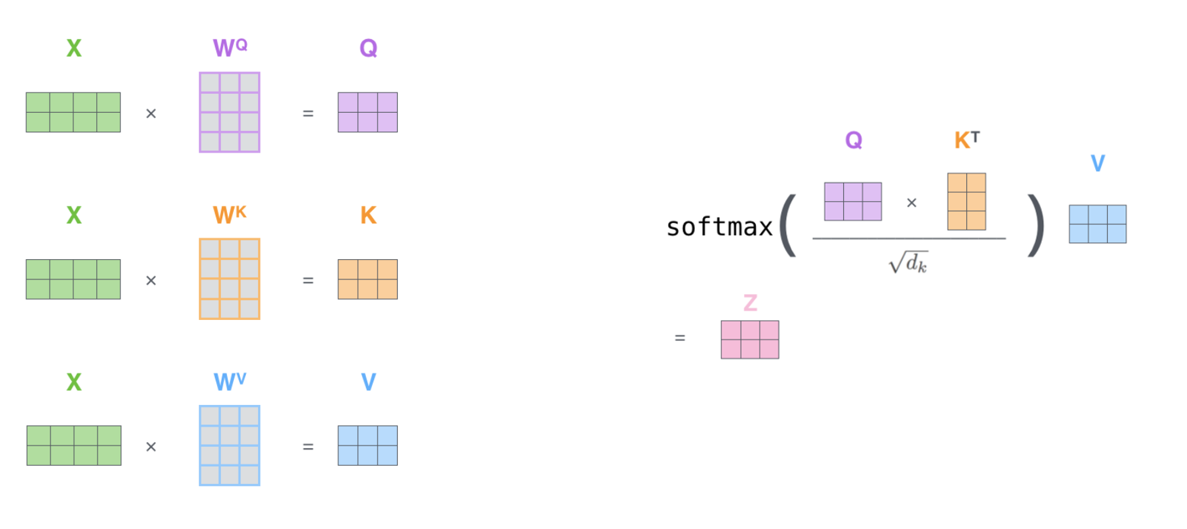

Полученные мытрицы `Z` можно сконкатенировать, чтобы получить одно финальную матрицу, описывающую результаты разных `Head`. Данная матрица поступает в FFNN (Feed Forward Neural Net) где эмбеддинги расширяются и снова сжимаются.

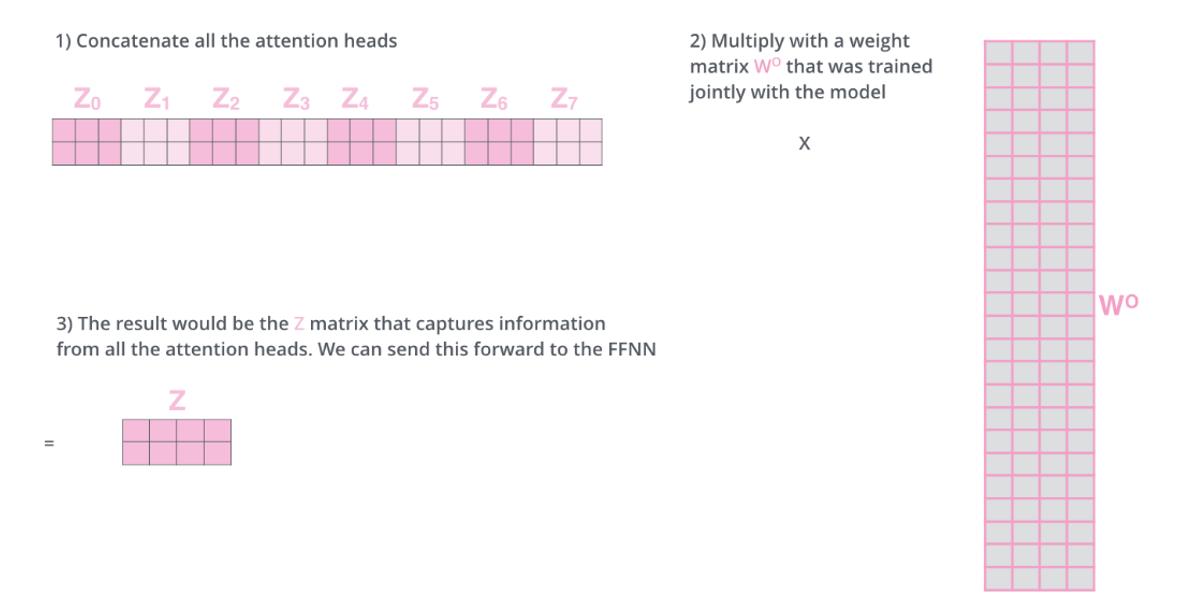

- `W0` это веса слоя FFNN




Еще раз о том, как входные эмбеддинги проходят через блок `self-attention`

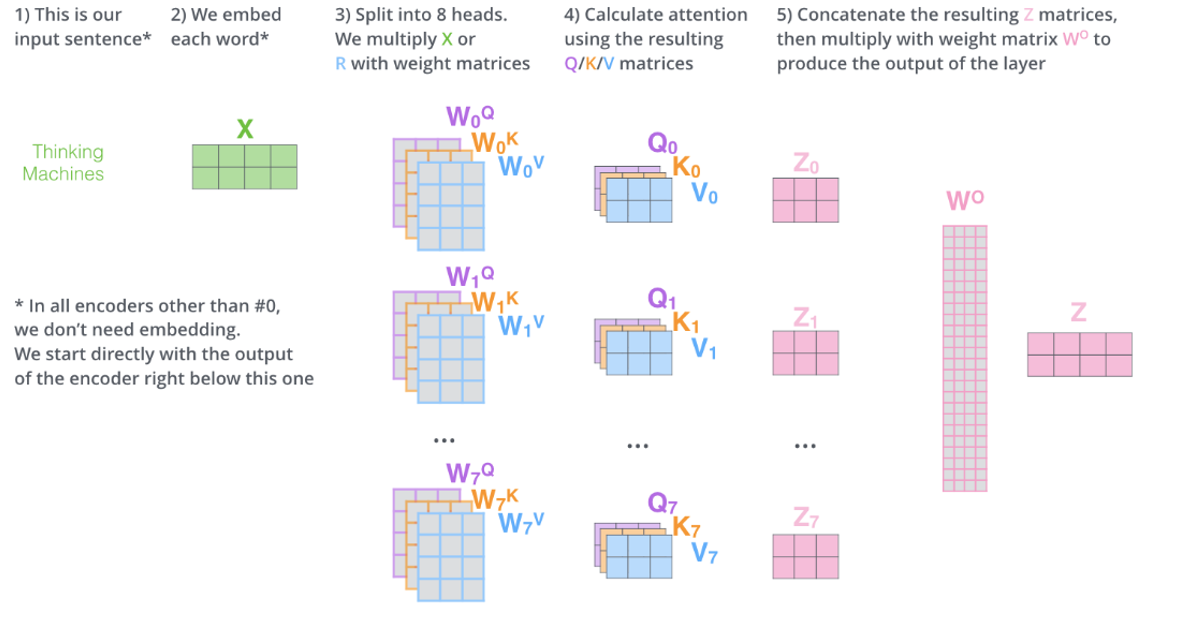

### Проблема порядка слов в Transformer / Позиционное кодирование
В алгоритме который мы рассматривали выше, нет информации о позиции слов. Следовательно, модель не учитывает порядок слов в предложении, что плохо. Для решения данной проблемы используется метод позиционного кодирования -> `Positional Encoding`. 

Это отдельная матрица эмбеддингов, которая по уровню иерархии находится там же, где и матрица эмбеддингов входных слов. Она обучается отдельно и имеет размерность равную размерности матрицы эмбеддингов входных токенов. Это позволяет нам суммировать эмбеддинги входных токенов с матрицей эмбеддингов позиционного кодирования.

Например, мы подаем некторое слово в `Encoder`. Первым делом мы достаем эмбеддинг этого слова/токен и затем определяем номер слова которое будет следующим (например 6). Далее мы идем в матрицу позиционных эмбеддингов, достаем 6 эмбеддинг и суммируем с входным эмбуддингом. 

Это позволяет получить эмбеддинг с закодированным временным сигналом. Время - этап, на котором слово/токен появилось в предложении.

Далее мы должны помнить, что:
- Длина матрицы эмбеддингов определяет размер словаря
- Длина матрицы позиционных эмбеддингов определяет длину последовательности с которой мы можем работать

Это, к сожалению, приводит к проблеме. Мы в идеале не хотим иметь большой словарь => ограничеваем длину последовательности с которой можем работать. Также, позиционные эмбеддинги сложно тренировать, так как маленьких текстов гораздо больше в интернете чем больших. Следовательно, мы не сможем обучить позиционные эмбеддинги с большим позиционным индексом (таких текстов просто очень мало и эмбеддинг получится неосмысленным).

### Решение проблемы
Выучивать матрицу позиционных кодирований как и для матрицы эмбеддингов токенов. Один из способ, инициализировать данную матрицу не случайными числами, а числами, которые бы получались из некоторой "умной" функции которая бы лучше задавала начальные значений для позиционного кодирования. Один из таких способов - использовать периодические тригонаметрические функции: sin/cos. Однако, исследования показали, что данный подход не влияет на итоговое качество особенно с ростом сложности трансформера. Сейчас, они инициализируются случайно и во время тренировки просто обучаются.

**Алгоритмы решения ограничения обрабатываемой последовательности**
- Относительное позиционное кодирование
    - Учитывать не конкретный индек позиции, а  например bin позиции. Это позволяет модели оперировать такими понятиями как:
        - "Токен находится далеко", "Близко", "Очень далеко", ...

### Оптимизационные трюки в Transformer
Для оптимизации обучения, в архитектуре `Transformer` используются следующие элементы:

### Residual Connection

`Residual Connection` позволяет модели лучше учиться. Так как `Transformer` обычно представляет из себя очень глубокую сеть, то при обратном распространении ошибки, градиенты могут перестать считаться => возникнет их затухание. В 2015 году из `Computer Vision` приходит техника которая позволяет решить даннуюпроблему введением `Residual` блоков.

Суть очень простая, эбеддинги просто прокидываются через блок на верх. Т.е. один и теже эмбеддинги идут в блок и вне блока. Это позволяет при обратном распространении градиенту растекаться и одна часть протечет ко входам и протечет дальше, а другая часть протечет через блок `self-attention`.

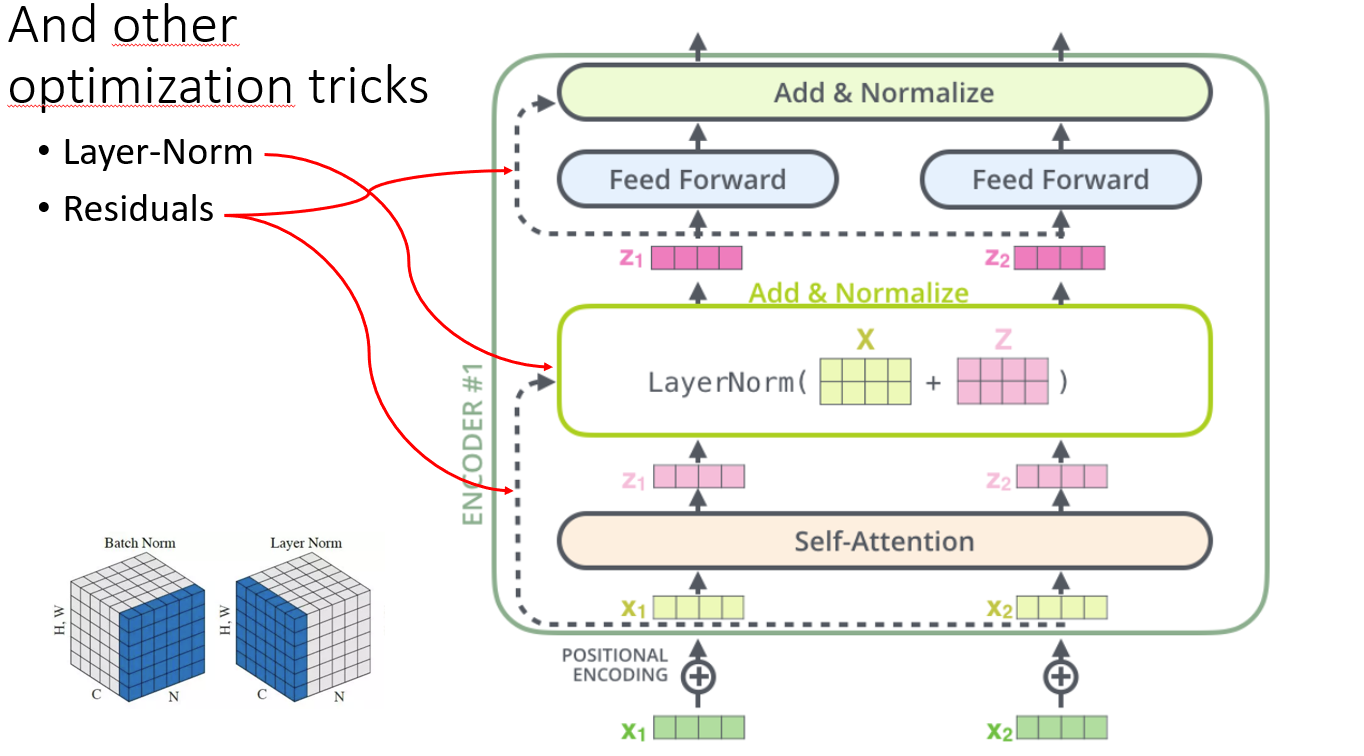

### Layer Norm
Слой нормализации весов аналогичный `Batch Norm` за тем исключением, что он проще. В нем нет столько ограничений и он проще считается. Данный блок имеет 2 версии:

- `Post Layer Norm`: применяется после `Multi Head Attention`

- `Pre Layer Norm`: применяется перед `Multi Head Attention`

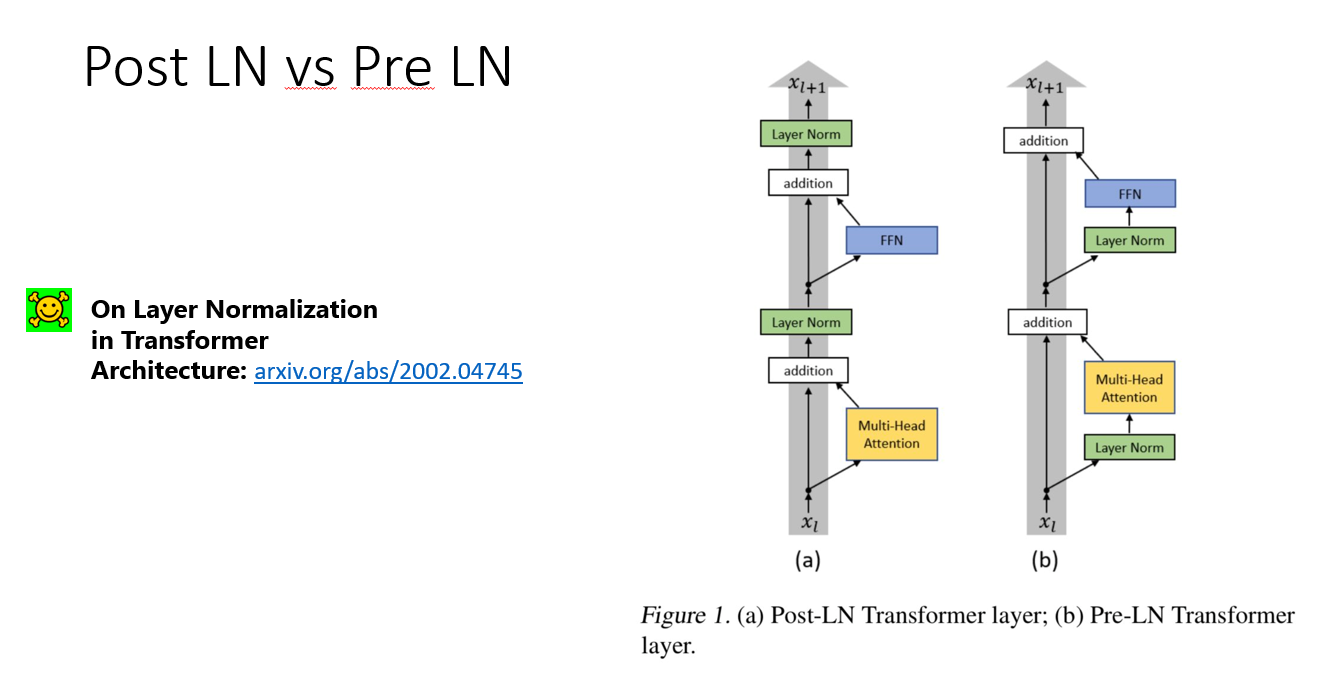

Исследования показали, что трансформеры обучаются стабильнее если мы применяем `Pre Layer Norm`. 

### Decoder
`Decoder` состоит из тех же частей, что и `Encoder` за тем исключением, что там появляется промежуточный блок `Encoder-Decoder-Attention`, еще его называют `Cross-Attention`.

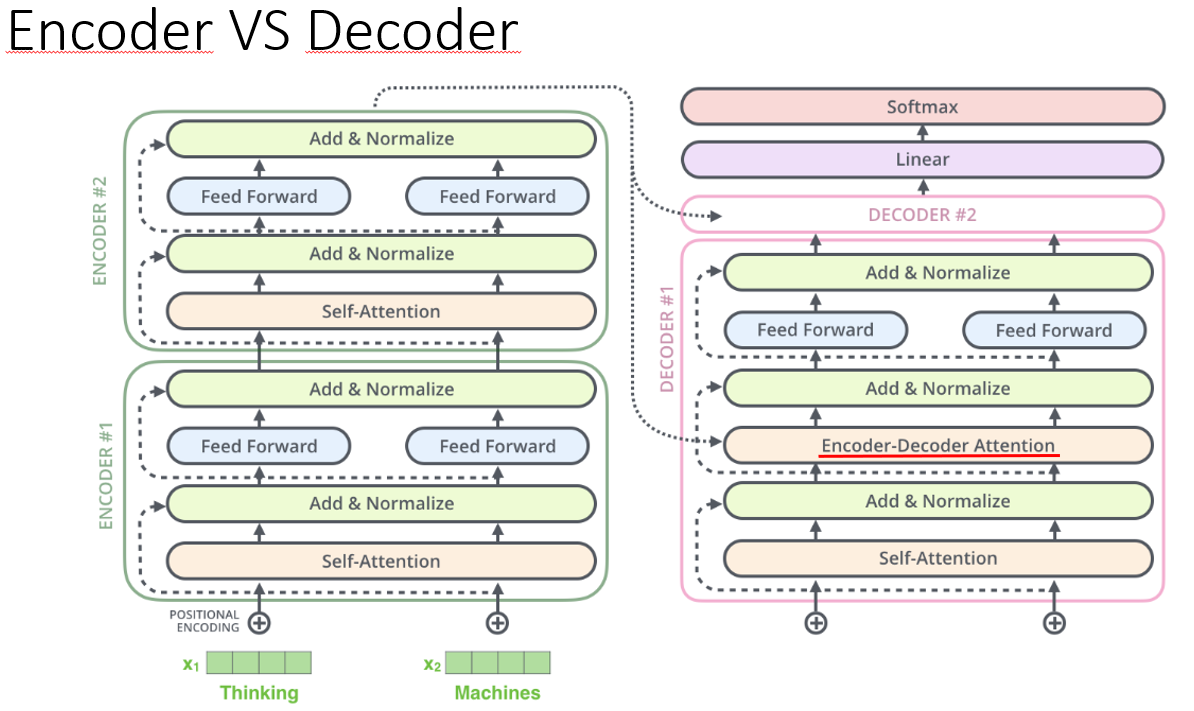

### Cross-Attention
При старте в `Decoder` всегда появляется одно слово, обычно это специальный токен `Start of Sequence <SOS>`. Это дает понять `Transformer`, что мы хотим начать что-то писать. Предварительно, мы могли закодирвать в `Encoder` например 3 слова `x1, x2, x3`. `Decoder` должен понять, что ему нужно написать, опираясь на текст на другом языке который еще был закодирован `Encoder` в эмбеддинги.  

Так как `Decoder` имеет свою матрицу `self-attention`, то он также имеет триплет матриц `Q, V, K`. Тогда логично предположить, что `Q` должно использоваться от `Decoder`. Например, `Decoder` мог сгенерировать 5 слов и ему нужно написать 6 слово, для того чтобы понять какое слово написать следующим, `Decoder` необходимо знать контекст или задать ему вопрос/запрос, а этот контекст был закодирован `Encoder`. Тогда получается, что ключи должны использоваться от того, что выдает `Encoder` (ключи энкодера).

Таким образом, `scores` для декодара считается произведением матрицы `Q` декодара и `K` матрицы энкодера, получается всегда прямоугольная матрица. Полученные `attention scores` этой матрицы говорят с какими весами необходимо взять `value` эмбеддинги от энкодера. Далее мы получаем выходной эмбеддинг который пропускаем дальше через сеть.

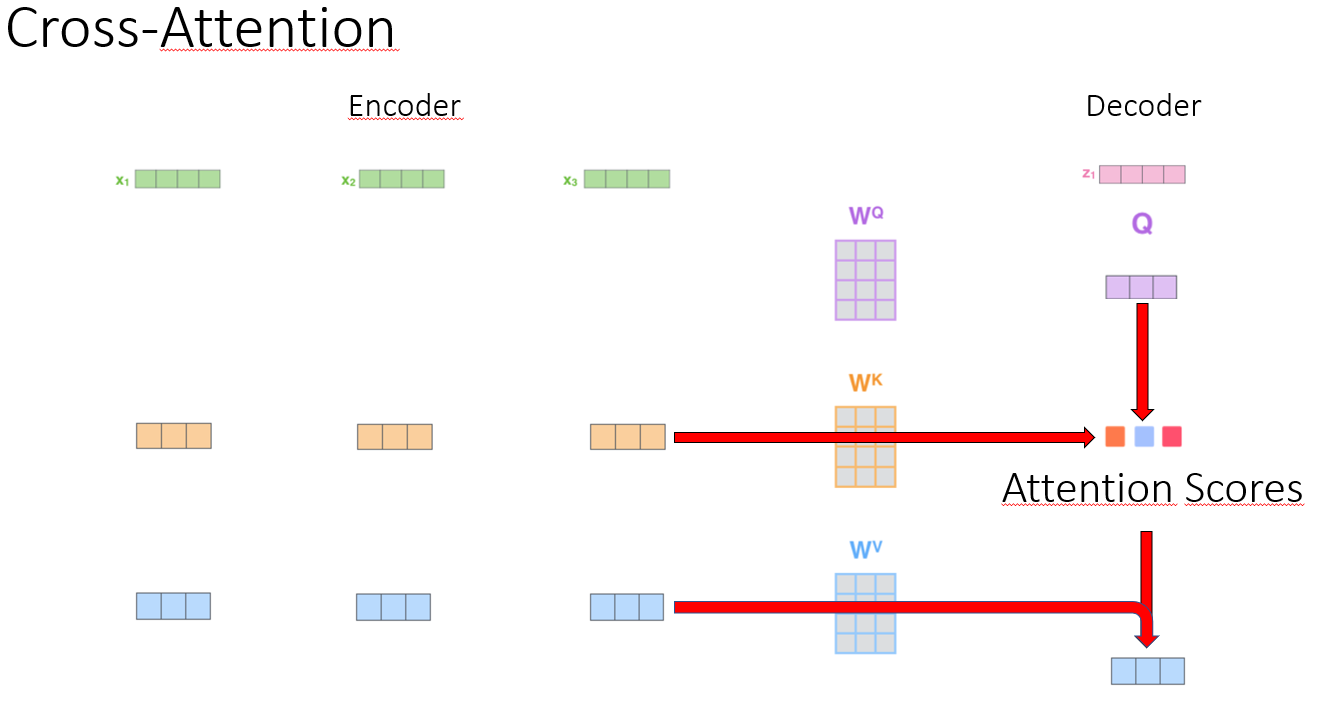

### Снова пример с удочкой
Например, мы переводим предложение с английского языка на русскйи язык. `Decoder` написал пару слов на русском и теперь ему необходимо сгенерировать следующее слово. Он задается вопросом: "А что мне нужно написать дальше?". `Encoder` уже закодировал эту информацию, так как видел все предложение на оригинальном языке, и мы все эту информацию перевели в вектора => эмбеддинги. 

Среди этих векторов `Decoder` может вычленить член информации который скажет что написать дальше. Именно поэтмоу мы используем `Cross Attention`: `query` из `Decoder`, а `key` и `vaue` от `Encoder`.

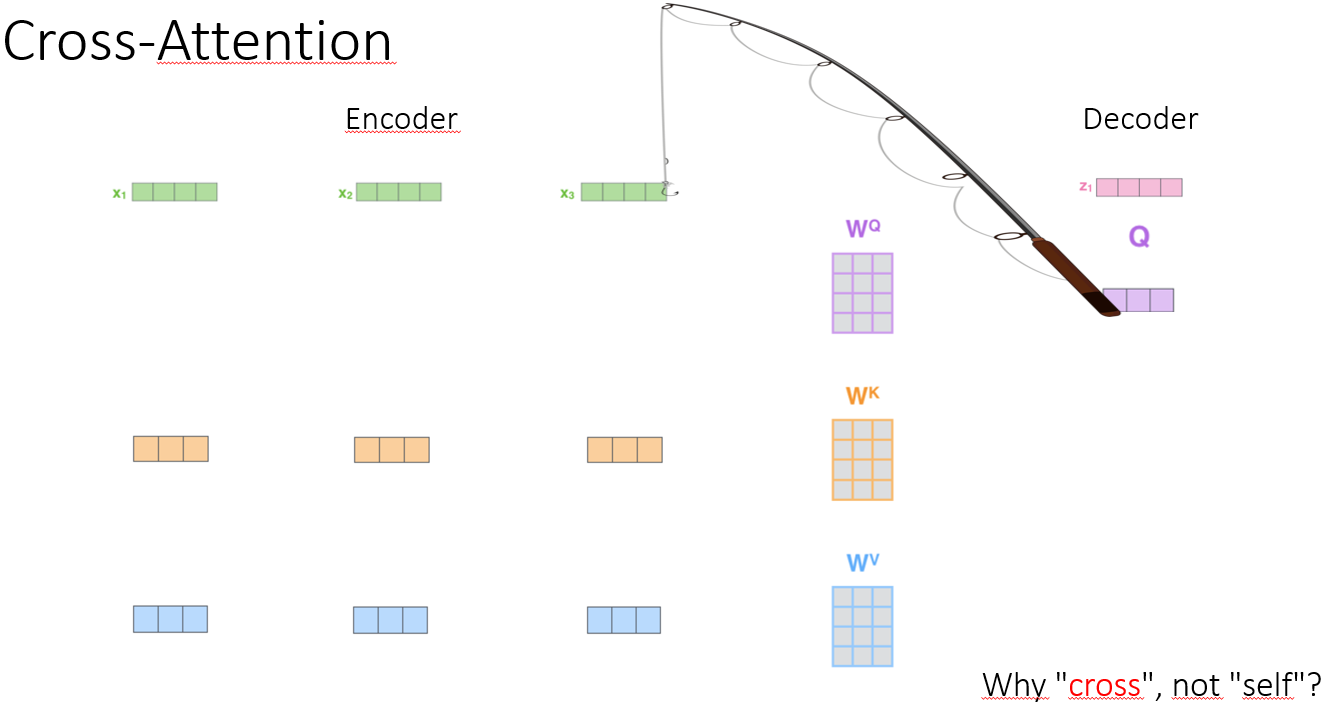

### Отличие Self-Attention от Cross-Attention
-  Self-Attention
    - Используем запросы и ключи из одного набора эмбеддингов, только из Encoder/Decoder. Делаем обуславливание на саму последовательность, на саму себя.

- Cross-Attention
    - Используем запросы и ключи из разных наборов эмбеддингов, запрос из Decoder, а ключи и значения из Encoder. Делаем обуславливание на внешний фактор.

### Как происходит перевод слов / Интуиция
Допустим, что мы хоти первести текст с английского ну руский. Текст на английском: `I am a student`:
- Text2Tokens: ["I", "am", "a", "student"]
- Tokens2Indexes: [10, 145, 22300, 421]
- Embeddings: [emb_0, emb_1, emb_2, emb_3]

1. Полученные эбмеддинги токенов поступают в `Encoder` предварительно суммируясь с позиционными эбмеддингами
2. Эмбеддинги проходят через несколько блоков `Encoder` и блоков `Self-Attention` 
3. Финалные эмбеддинги на выходе последнего блока `Encoder` подаются каждому блоку `Decoder`
4. `Decoder` вычисляет для данных эмбеддингов значения `Key` и `Value` 
5. Предсказывает слово -> `Я`
6. Далее процесс повторяется, но только в рамках `Decoder` + слово которое было сгенерировано ранее, также подается на вход `Decoder`
7. Предсказываем  следующее после токена/слова `Я` слово => `студент`
8. Подаем на вход `Decoder` уже 2 слова `Я студент`
9. Рекурсивно дописываем предложение

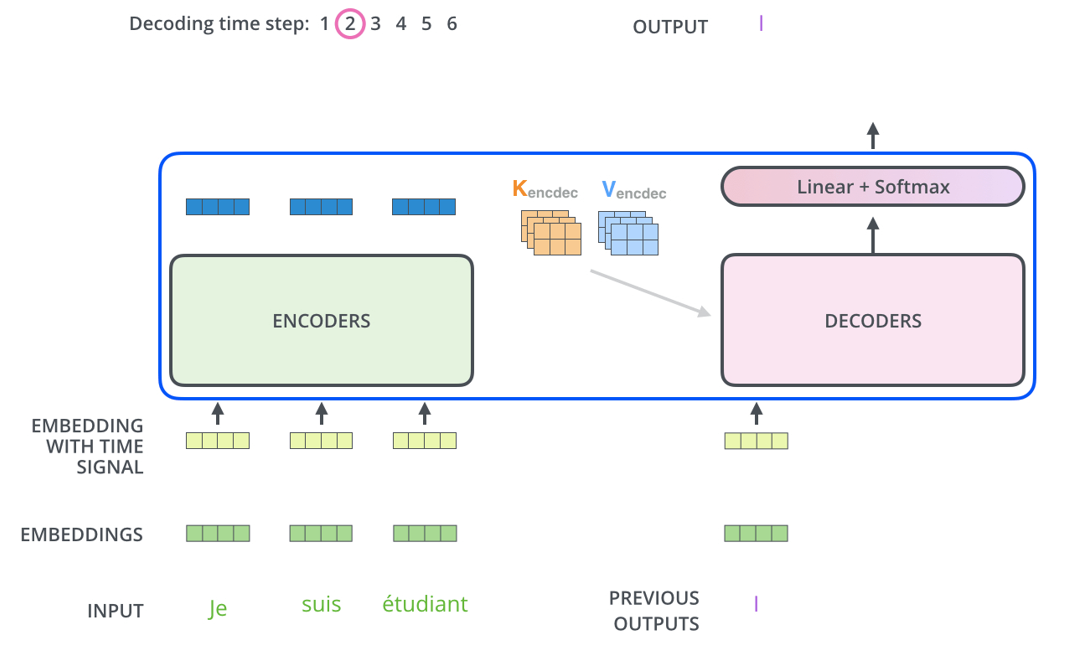


### Основное отличие Encoder от Decoder
`Encoder` видит все предложение за раз и производит эмбеддинги которые контекстуализированы с 2-х сторон (мы видим и левый и правый контекст, т.е. что было до и после слова). А в `Decoder` мы не видим, что будет в будущем. `Decoder` имеем информацию только из `Encoder` и что мы уже написали на данный момент, а неизвестные слова справа он предсказывает.

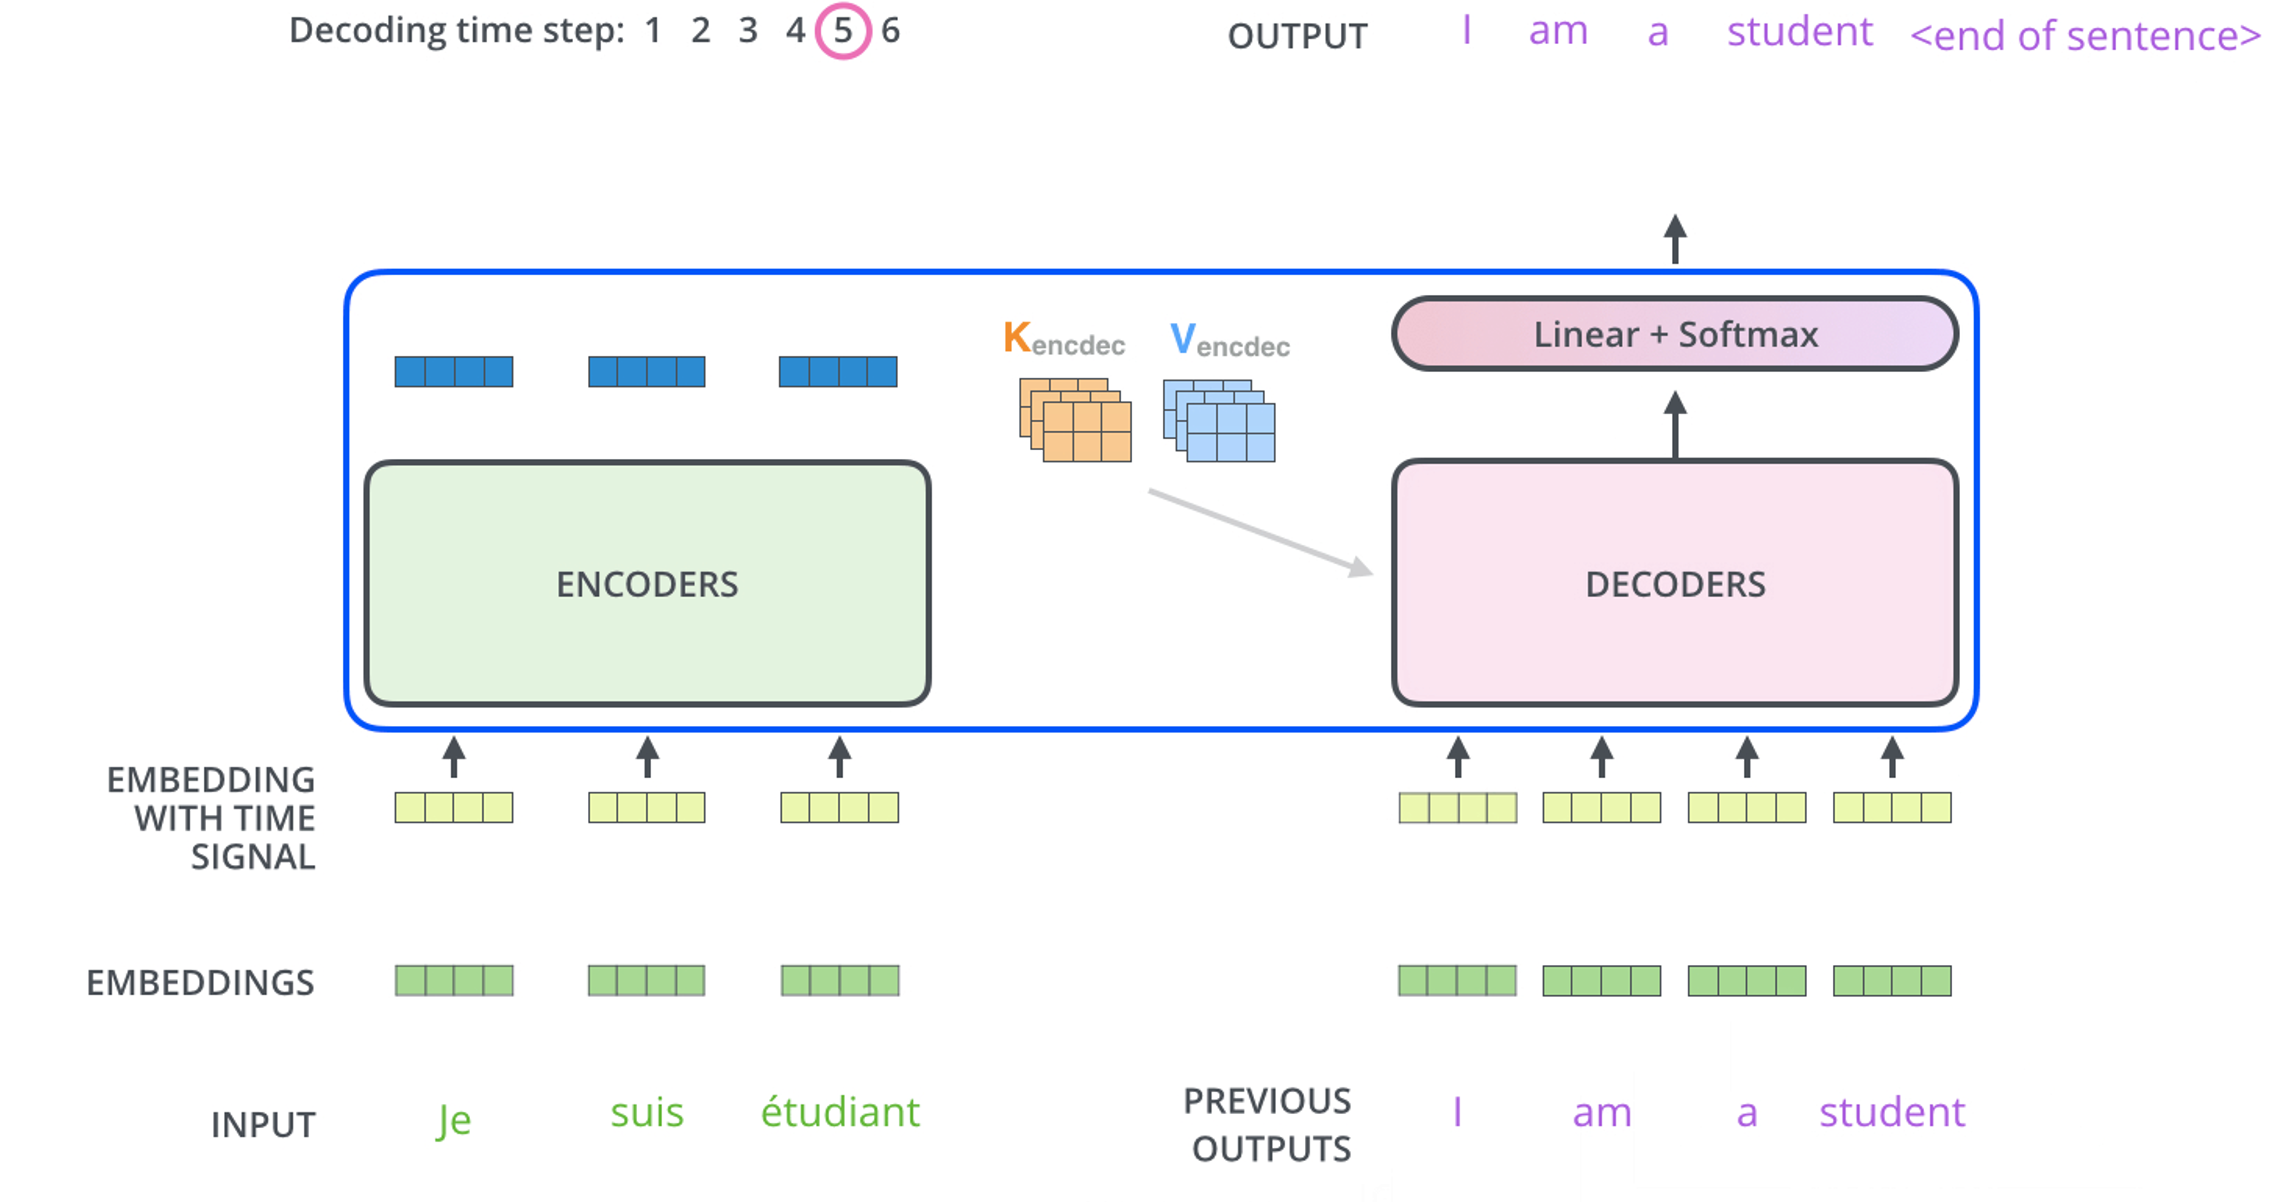

### Как происходит предсказание слова?
На самом последнем FFNN слое `Decoder` выдает эмбеддинг. Далее он проходит через линейный слой который переводит данный эмбеддинг в **вектор логитов размерности словаря матрицы эмбеддингов**. Этот вектор характеризует вероятность повления **каждого слова** из словаря. Далее, полученный логиты пропускаются через **softmax** для предсказания логарифма вероятностей того, что оно будет следующим. Мы можем применить функцию argmax для выбора слова/токена с наивысшей вероятностью. Argmax возвращает индекс слова, а не слово! 

Мы затем идем к токенайзеру и смотрим какое слово имеет индекс 5. Это слово используется как предсказанное.

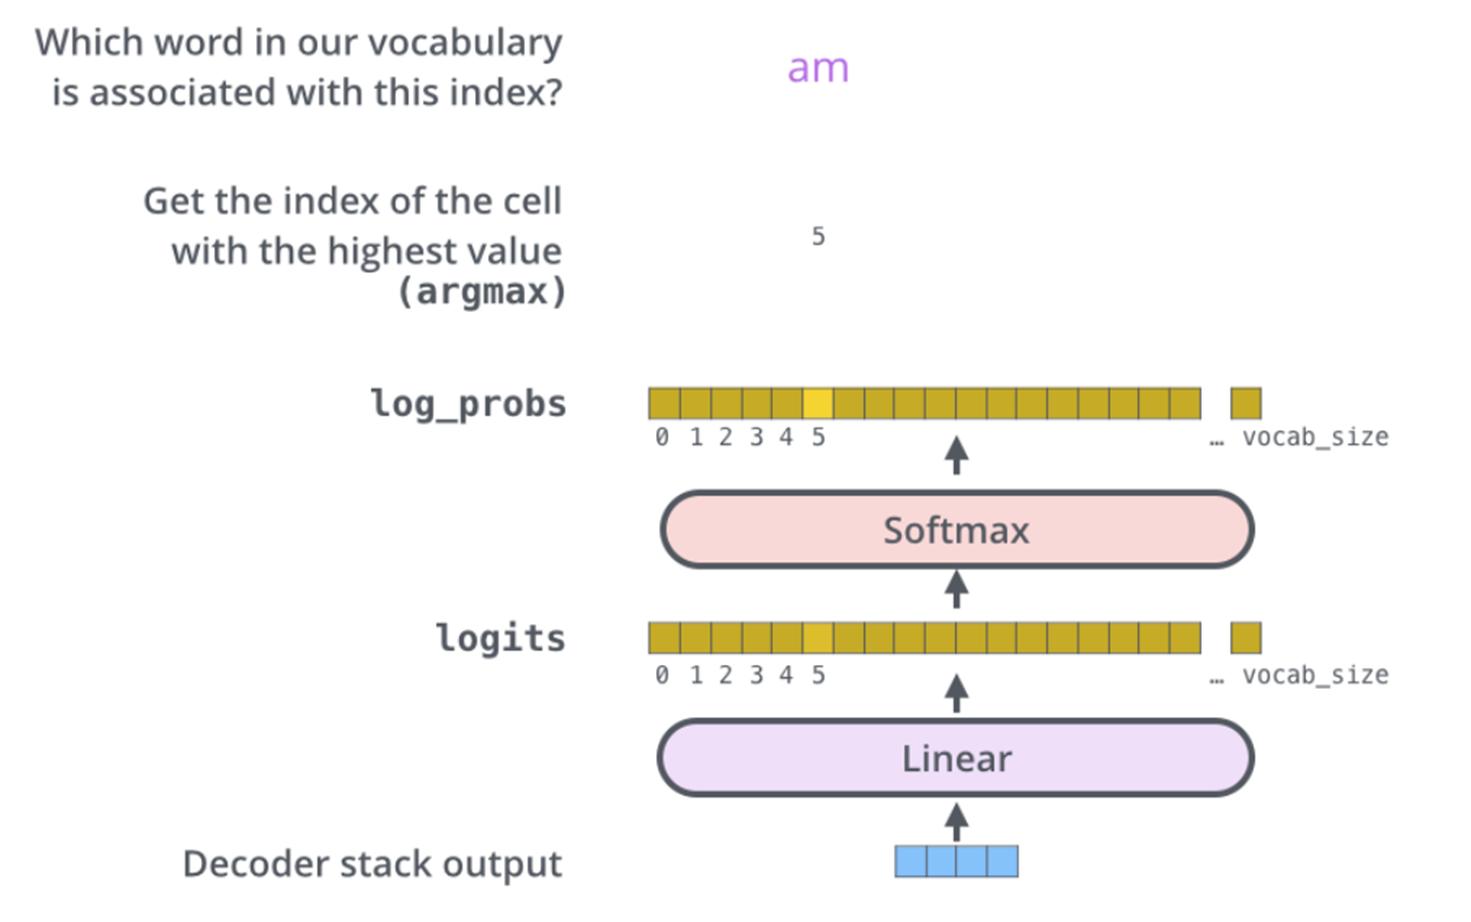

### Небольшая проблема Decoder / Mask Self-Attention
Когда мы обучаем `Decoder` мы не должны смотерть в будущее, так как при генерации 3-го слова у нас нет доступа к 4, 5 или 6 слову. Все что мы имеем это `Encoder` вектора. Для того, чтобы не смотреть в будущее применяется `mask self-attention.`

В ней зануляется верхний треугольник весов/связей. Например, на рисунке ниже для 5 слова учитываются только 5 элементов матрицы, начиная с 6 мы имеем нули => не смотрим в будущее.

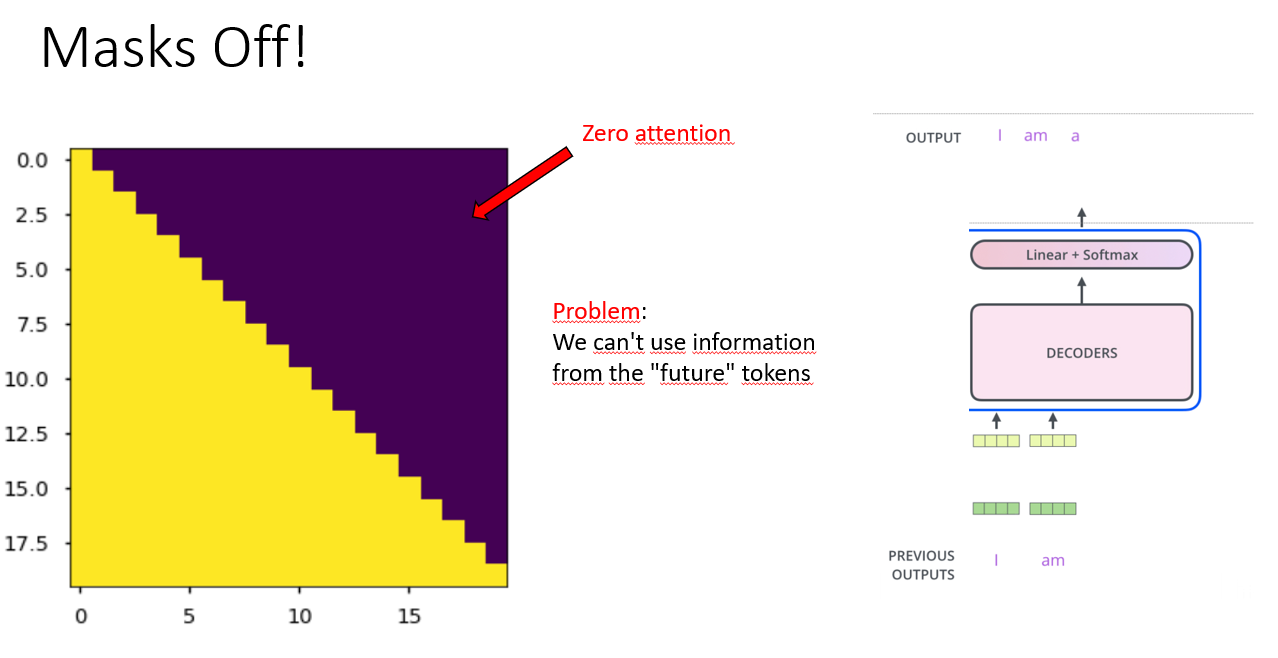

Например, на рисунке ниже можно взглянуть на еще один пример маскирования матрицы `self-attention`. Предполодим, что мы рассматриваем токен под индексом 5:
- `Self-Attention`
    - Смотрит на 4 токена назад и на 3 токена вперед

- `Masked Self-Attention`
    - Смотрит только на 4 последние токена
    
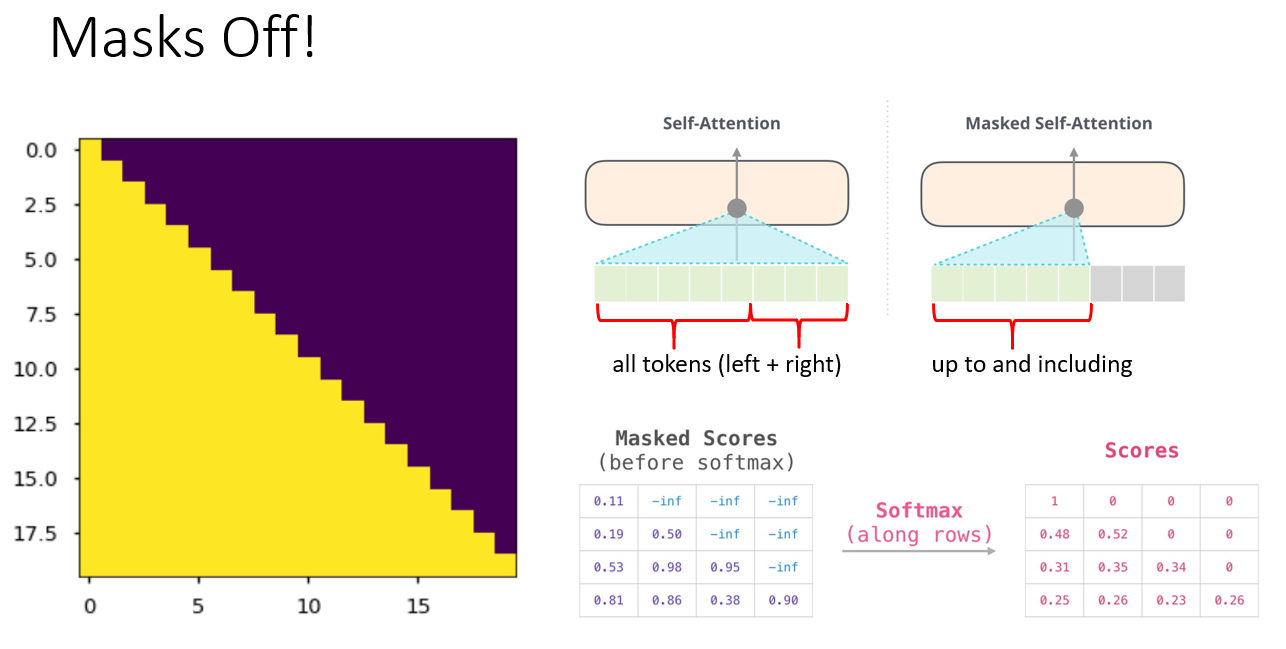

- так как `scores` перемножается с `value`, то 0 нулевой скор означает, что мы игнорируем данное слово.

### Как выглядят признаки и labels для при обучении?
Например, предложение `Robot must obey orders` будет иметь следующую структуру

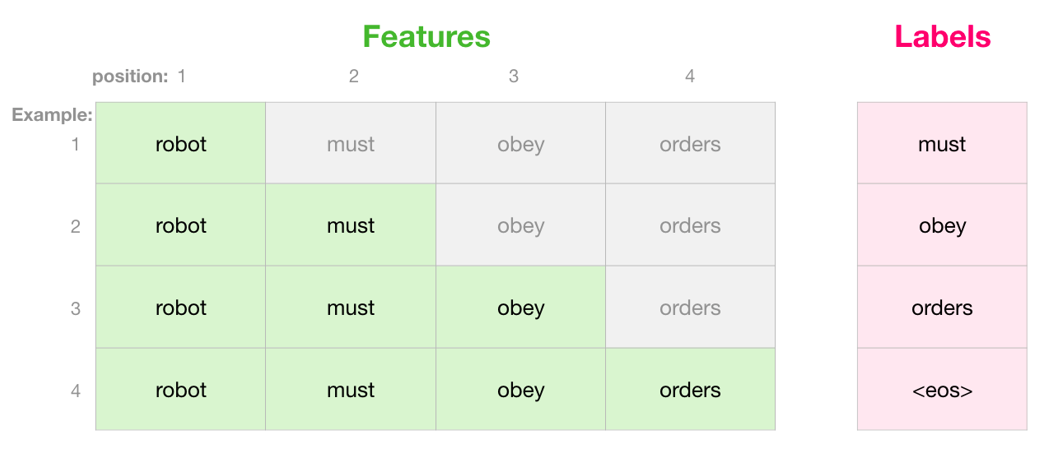

Из тренировачных наборов данных мы можем составить набор OHE векторов которые будут описывать целевой вектор (target). Снова представим, что у нас есть только одно предложение:
- I am a student

Для данного предложения мы получим 5 OHE векторов которые необходимо предсказать модели:

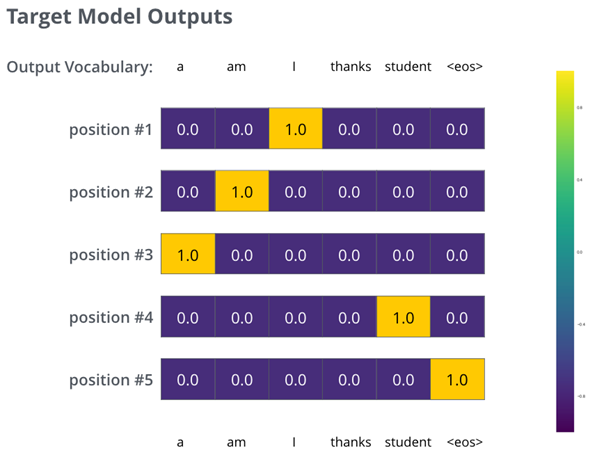


- Функционал ошики стандартный: `Cross-Entropy Loss`

- ` Back Propagation` необходим как для `Decoder` так и для `Encoder` так как его эмбеддинги задействубтся в обучении

### BERT vs GPT
Архитектура трансформера была изобретена для задчи машинного перевода. Однако, используя следующие трюки можно получить абсолютно разны модели

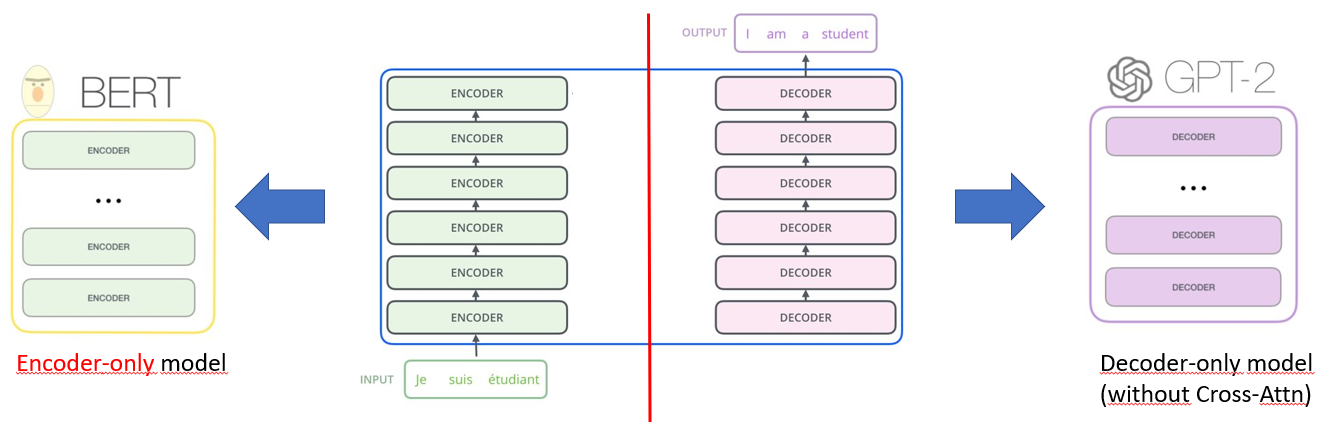

**GPT-2 / Decoder-only Model**
- Содержит все блоки только из оригинального `Decoder` кроме `Cross-Attention`. Так как это Decoder, то он только генерирует текст/токены ...
- +/- понятно как обучать

**BERT / Ecoder-only Model**
- Содержит в себе только блоки `Encoder` (занимается только Encoding) и мы не предсказываем следующее слово. Как быть? Какую ФП использовать?

### BERT Training / Bidirectional Encoder Representations from Transformers
BERT обучается на задаче `Masking Language Modelling`. Суть которого в том, что мы выбираем из всего нашего предложения 15% токенов и случайным образом заменяем часть из них на токен [MASK]. Затем BERT должен предсказать, какой именно токен был заменен на `[MASK]`. Финальный слой для предсказания аналогичен слою `Decoder`. 

Таким образом мы можем выучивать из контекста какими должны быть эмбеддинги для замаскированного слова. 

Для маскирования ипользуется следующий подход (определен исследованиями):
- 15% токенов отбираются для предсказания
    - 80% из них максируются -> `[MASK]`
    - 10% заменяются на случайные слова
    - 10% остаются неизменными

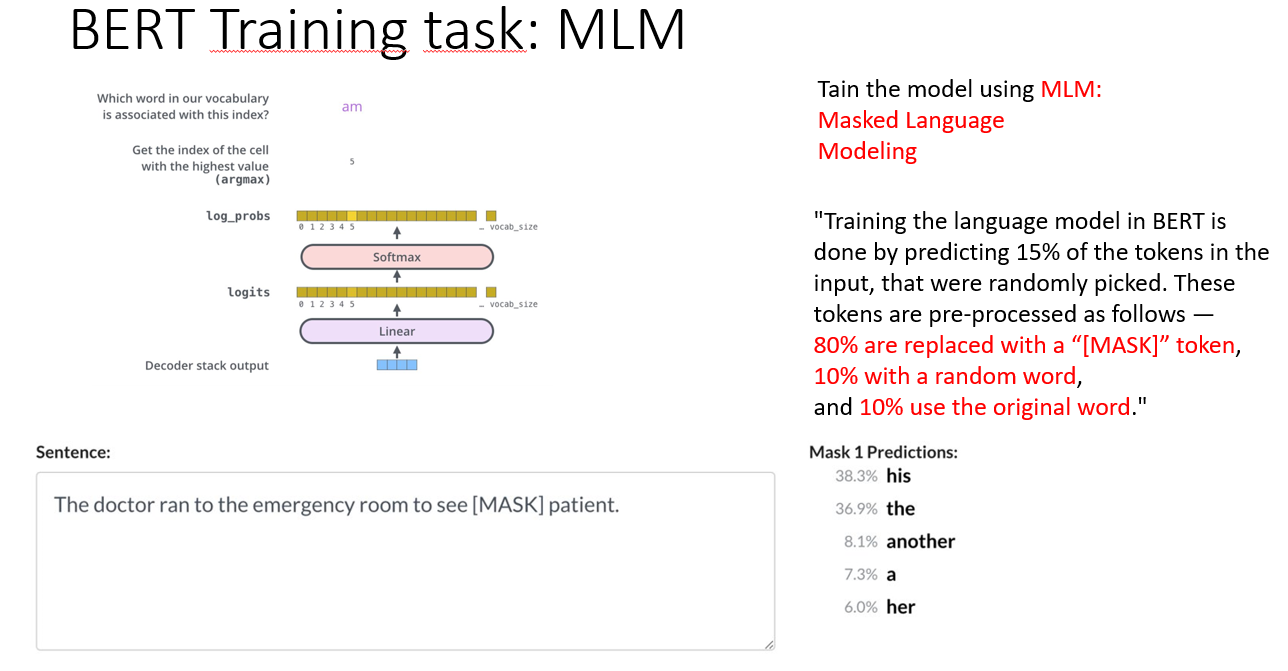


**Объяснение, почему именно такая пропорция**

Если для каждого маскированного слова мы будем предсказывать только его, то модель обучится копировать вход и выход, контекст не будет учиться. А если мы будем ставить случайное слово, то модель выучит плохое поведение -> выходной эмбеддинг никогда не должен описывать слово которое было на входе. Поэтому пропроцрия выше показала себя лучше всего на прикладных задачах.

### Bert Training / Next  Sentence Prediction (NSP)
По сути это простой бинарный классификатор, который определяет относятся ли 2 предложения, поданные на вход, к 1-му контексту. Например:

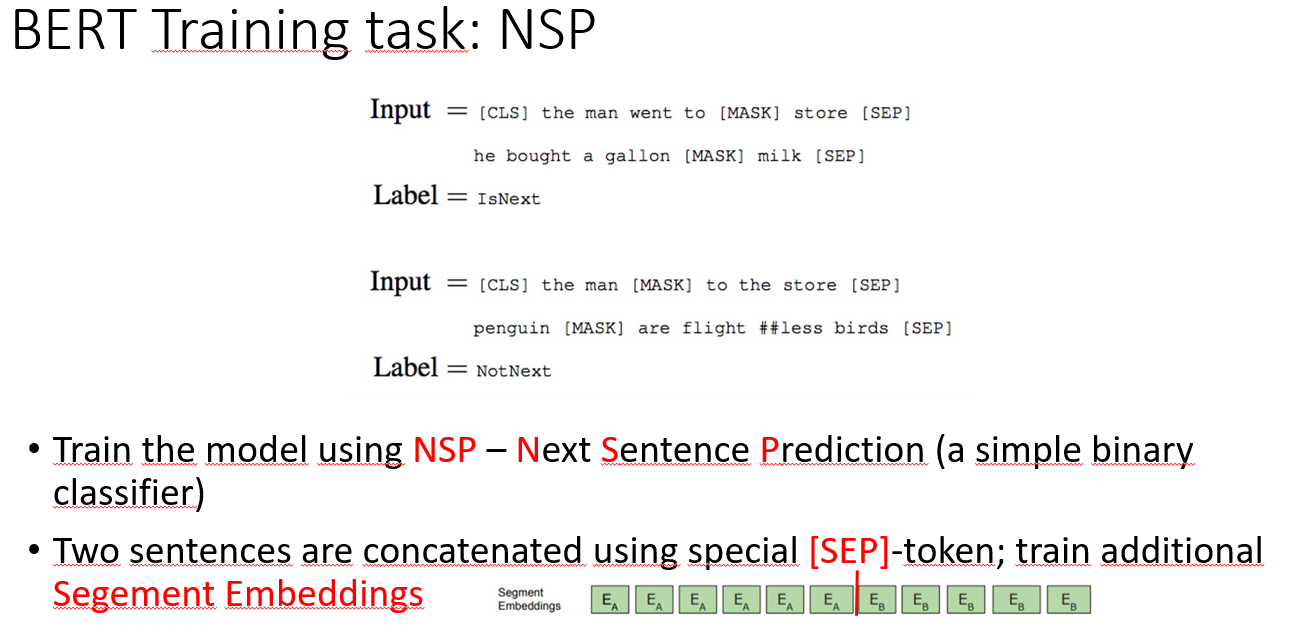


В примере выше, первые 2 предложения очень связаны. Одно являтся продолжение другого (связаны по смыслу), а второе нет. Поэтому для первых 2-х предложений модель будет иметь высокие `attention score` для некторых слов второго рпедложения -> индикатор того, что предложения имеют связь.

Как можно заметить, весь текст разбивается на 2 части. За разделение отвечает специальный токен `[SEP]`. Именно он говорит модели, что после меня следует другая часть предложения. Часть токенов левого и правого предложения по-прежнему маскируются `[MASK]`. Далее мы должны определить целевой вектор / `target` который является бинарной меткой (0 - предложения не связаны, 1 - предложения связаны). Для этого мы используем метку `Label`.

Кроме того, в начале каждого предложения мы имеем специальный токен `CLS`. Этот токен формирует специальный эмбеддинг, к которому мы присоединяем самый последний **линейный слой**  в `Encoder`, который выступает в качестве бинарного классификатора (одинаковый контекст/ нет, контекст разный). Таким образом, его задача вытянуть весь контекст из 1-го и 2-го предложения и сформировать такое представление, чтобы линейный классификатор поверх него мог решать задачу Next Sentence Prediction.

Части 2-х предложений, разделяемы токеном `[SEP]` часто называют сегментами `Segments`. Данные сегменты задают `Segment Embeddings` который кодируют полезную метаинформацию (гео, веб домены, и.т.д).


Таким образом, мы учим модель так, чтобы она могла сама динамически определять какие именно предожения/контексты релевантны и что необходимо брать в attention. 


- MASK: MASKED
- SEP: SEPARATION
- CLS: CLASSIFICATION

### Text Representation in BERT
В BERT мы имеем 3 вида эмбеддингов
- Эмбеддинги слов/токенов (матрица эмбеддингов)
- Позиционные эмбеддинги
- Сегментный эмбеддинги. Обычно используют 2, 3, 5 сегментов (из практики)

На вход модели подается сумма этих 3-х эмбеддингов

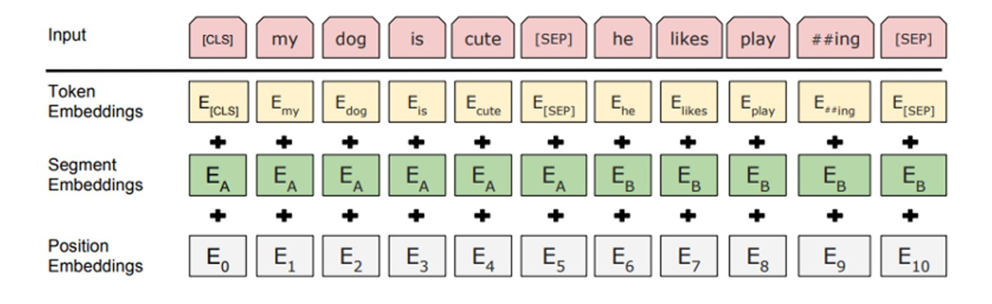

Таким образом входная информация учитывает:
- характеристику текста
- позиции слов, чтобы self-attention не был инвариантен к последовательности токенов
- конце и начало предложений 

### Почему Transformer эффективен и более оптимизируемый?

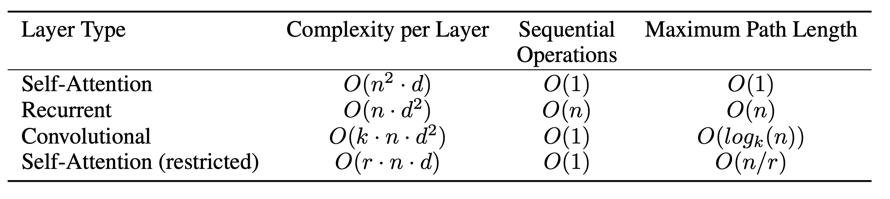

- `Complexity per Layer`: вычислительная сложность слоя
- `Sequential Operations`: число параллельных операций
- `Мaximum Path Length`: максмальная длина последовательности или максимальный путь


**Complexity per Layer**
- У `self-attention` сложность квадратичная по числу входных токенов и линейна по размерности входных эмбеддингов. У `RNN` все наоборот: линейные по числу токенов, но квадратны по размерности эмбеддинга. Предположим, что мы хотим теперь масштабировать модель по числу токенов `n` и размерности эмбеддингов `d`. Если мы используем размерность эмбеддинга равную 10к, то в квадрате это безумно большое число. Размеры последовательностей обычно небольшие, поэтому Transformer выигрывает у RNN.


**Sequential Operations**
- Количество параллельных операций в `self-attention` константное и связи токенов друг с другом можно считать параллельно, вычиления независимы! Что нельзя сказать про `RNN`. Например, чтобы предсказать следующее слово, используя `Decoder` и предыдущие 100 слов, нам нужно выполнить вычисление всего лишь 1 раз, а в `RNN`необходимо каждое слово обработать отдельно, чтобы учитывать контекст предыдущего слова/слов.


**Мaximum Path Length`**
- В RNN эмбеддингам необходимо проходить гораздо больший путь, чем у `Transformer`. Например, у нас 100 слов. Наша модель хочет учесть взаимосвязи 100 слова с 1. В этом случае ембеддинг 1-го слова проходит через 99 эмбеддингов других слов. Это очень много! В Transformer мы просто можем посмотреть матрицу `self-attetion` и вычислить связь за константное время.

### References
- [Transformers Explanation Video (RUS)](https://www.youtube.com/watch?v=iOrNbK2T92M&t=2819s)
- [BERT Attention Playground](https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing#scrollTo=-QnRteSLP0Hm)